# Setup Environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# configure matplotlib output
import matplotlib as mpl
mpl.style.use('../config/clean.mplstyle') # this loads my personal plotting settings
%matplotlib inline

In [3]:
# if you have an HD display
%config InlineBackend.figure_format = 'retina'

# Load Data

In [9]:
# load in Penn World Tables
pwt0 = pd.read_excel('../data/pwt90.xlsx', sheet_name='Data', engine='openpyxl')
pwt = pwt0.pivot('year','countrycode')

In [10]:
# choose a set of countries
country = ['USA', 'CHN', 'KOR', 'BRA', 'IND']

# Basic Plotting

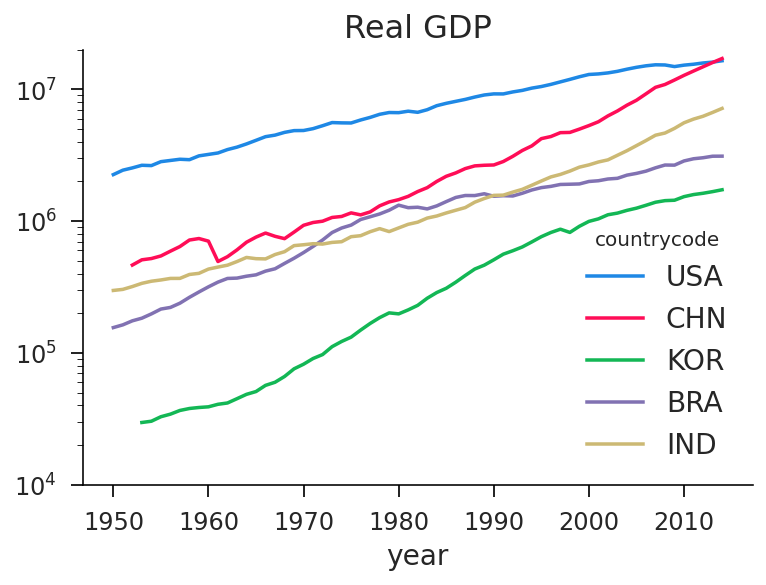

In [15]:
# plot the log of real GDP
sel = pwt['rgdpna'][country]
sel.plot(logy=True, title='Real GDP', ylim=(1e4, 2e7));

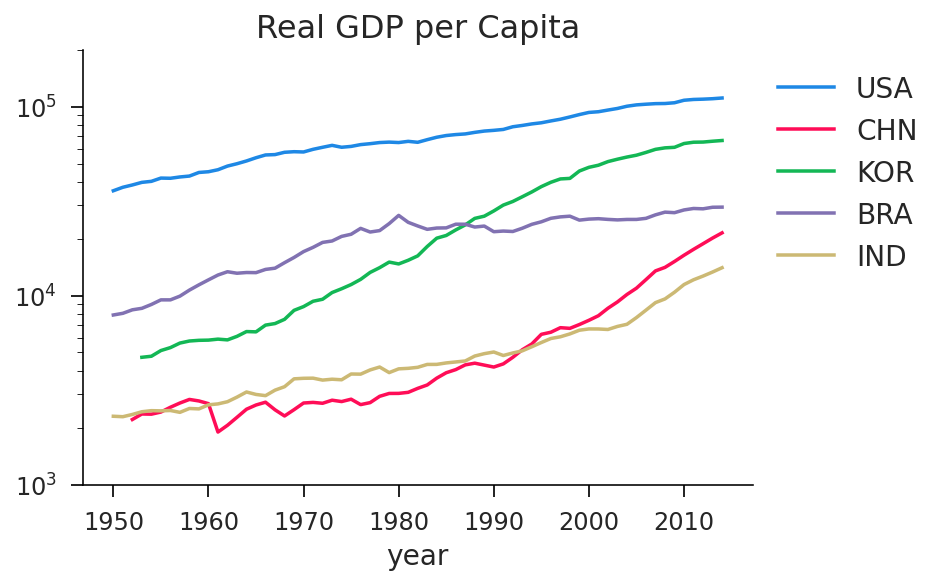

In [25]:
# plot the log of real GDP per capita
rgdp_per = pwt['rgdpna']/pwt['emp']
sel = rgdp_per[country]
ax = sel.plot(logy=True, title='Real GDP per Capita', ylim=(1e3, 2e5))
ax.legend(bbox_to_anchor=(1, 1)); # put legend on outside

# Country TFP

In [26]:
# calculate TFP
alpha = 0.35
hcap = pwt['hc']*pwt['emp']
ltfp = np.log(pwt['rgdpna']) - alpha*np.log(pwt['rkna']) - (1.0-alpha)*np.log(hcap)
tfp = np.exp(ltfp)

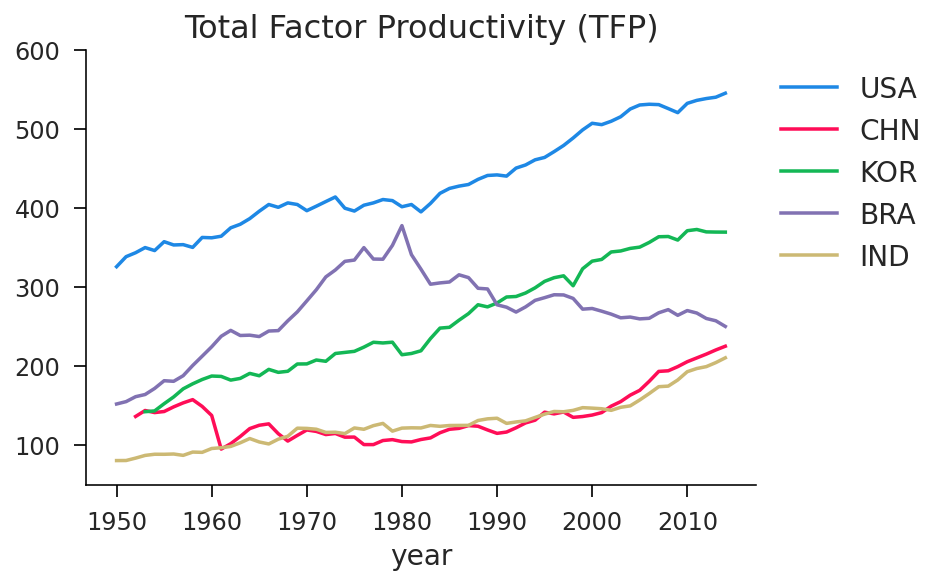

In [37]:
# plot TFP data
sel = tfp[country]
ax = sel.plot(title='Total Factor Productivity (TFP)', ylim=(50, 600))
ax.legend(bbox_to_anchor=(1, 1)); # put legend on outside

# Growth Decomposition

In [92]:
# do growth decomposition into: TFP, capital (physical capital), and labor (human capital)
lcapital = alpha*np.log(pwt['rkna'])
llabor = (1.0-alpha)*np.log(hcap)
decomp = pd.concat({
    'TFP': ltfp,
    'Capital': lcapital,
    'Labor': llabor
}, axis=1)
decomp = decomp.swaplevel(axis=1).sort_index(axis=1)
growth = 100*(decomp.loc[1950:].diff(5).shift(-5)/5)

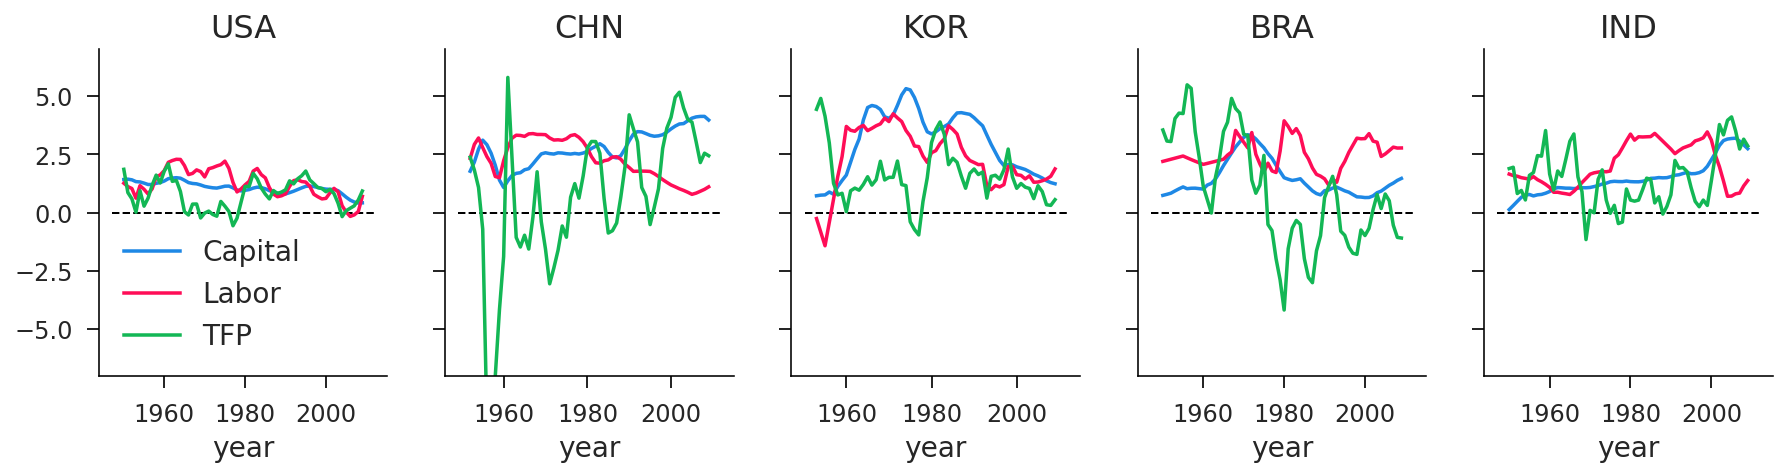

In [103]:
fig, axes = plt.subplots(ncols=len(country), figsize=(15, 3), sharey=True)
for c, ax in zip(country, axes):
    growth[c].plot(title=c, ax=ax, legend=(c=='USA'))
    ax.hlines(0, *ax.get_xlim(), linestyle='--', linewidth=1)
    ax.set_ylim(-7, 7)